In [75]:
import json
import re
import pymysql
import pandas as pd
#sudo pip3 install ipywidgets ipydatetime
#jupyter nbextension enable --py widgetsnbextension
#jupyter nbextension enable --py ipydatetime
import ipywidgets as widgets
#import ipydatetime
#import datetime
from IPython.display import display, clear_output, Markdown
%matplotlib inline
from matplotlib import pyplot as plt
pd.options.display.float_format = "{:.0f}".format
plt.rcParams['figure.figsize'] = [15,7]

In [60]:
with open('../../server/app/config.json') as json_data_file:
    data = json.load(json_data_file)
    url = data['SQLALCHEMY_DATABASE_URI']
user, password, host, database = re.match('mysql://(.*?):(.*?)@(.*?)/(.*)', url).groups()
conn = pymysql.connect(host=host,port=3306,user=user,passwd=password,db=database)

In [61]:
query_39732c="""
    SELECT  TIMESTAMP,
            DATA->'$.DATA.NODE.FREE_HEAP' AS FREE_HEAP,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX0' AS MUX0,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX1' AS MUX1,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX2' AS MUX2,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX3' AS MUX3,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX4' AS MUX4,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX5' AS MUX5,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX6' AS MUX6,
            DATA->'$.DATA.CAPACITIVEMOISTURE.MUX7' AS MUX7
    FROM OASIS_DATA
    WHERE NODE_ID='oasis-39732c'
    ORDER BY TIMESTAMP asc
    """
df = pd.read_sql_query(query_39732c, conn).astype(int)
query_397c0e="""
    SELECT  TIMESTAMP,
            DATA->'$.DATA.DHT.TEMPERATURE' AS TEMPERATURE,
            DATA->'$.DATA.DHT.HUMIDITY' AS HUMIDITY
    FROM OASIS_DATA
    WHERE NODE_ID='oasis-397c0e'
    ORDER BY TIMESTAMP asc
    """
dft = pd.read_sql_query(query_397c0e, conn).astype(int)

In [62]:
print("Interval:", df['TIMESTAMP'][1] - df['TIMESTAMP'][0], "secs")
print("Duration:", int(df['TIMESTAMP'].tail(1) - df['TIMESTAMP'][0])/3600, "hrs")

Interval: 205 secs
Duration: 178.9025 hrs


In [63]:
df[['FREE_HEAP','MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX6','MUX7']].describe()

,FREE_HEAP,MUX0,MUX1,MUX2,MUX3,MUX4,MUX5,MUX6,MUX7
count,10654,10654,10654,10654,10654,10654,10654,10654,10654
mean,32286,265,247,266,249,257,277,271,268
std,95,10,7,9,7,7,8,8,9
min,31480,240,226,242,229,237,257,252,246
25%,32152,257,242,259,244,252,271,265,261
50%,32344,264,246,266,249,257,277,271,268
75%,32344,271,253,272,255,261,283,278,274
max,32704,296,265,295,272,278,298,294,295


In [64]:
df[['FREE_HEAP','MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX6','MUX7']].describe()

,FREE_HEAP,MUX0,MUX1,MUX2,MUX3,MUX4,MUX5,MUX6,MUX7
count,10654,10654,10654,10654,10654,10654,10654,10654,10654
mean,32286,265,247,266,249,257,277,271,268
std,95,10,7,9,7,7,8,8,9
min,31480,240,226,242,229,237,257,252,246
25%,32152,257,242,259,244,252,271,265,261
50%,32344,264,246,266,249,257,277,271,268
75%,32344,271,253,272,255,261,283,278,274
max,32704,296,265,295,272,278,298,294,295


In [65]:
dft[['TEMPERATURE','HUMIDITY']].describe()

,TEMPERATURE,HUMIDITY
count,21300,21300
mean,27,27
std,2,10
min,20,12
25%,26,17
50%,27,28
75%,28,33
max,43,64


In [66]:
df[['FREE_HEAP','MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX6','MUX7']].describe()

,FREE_HEAP,MUX0,MUX1,MUX2,MUX3,MUX4,MUX5,MUX6,MUX7
count,10654,10654,10654,10654,10654,10654,10654,10654,10654
mean,32286,265,247,266,249,257,277,271,268
std,95,10,7,9,7,7,8,8,9
min,31480,240,226,242,229,237,257,252,246
25%,32152,257,242,259,244,252,271,265,261
50%,32344,264,246,266,249,257,277,271,268
75%,32344,271,253,272,255,261,283,278,274
max,32704,296,265,295,272,278,298,294,295


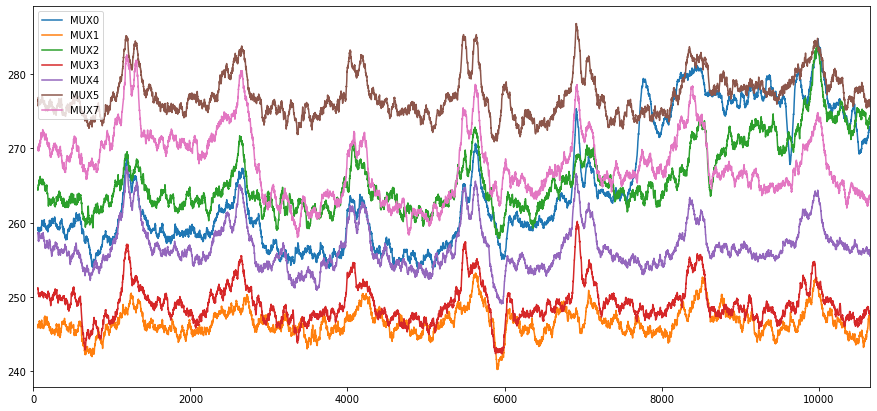

In [67]:
df[['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX7']].rolling(60).mean().plot()

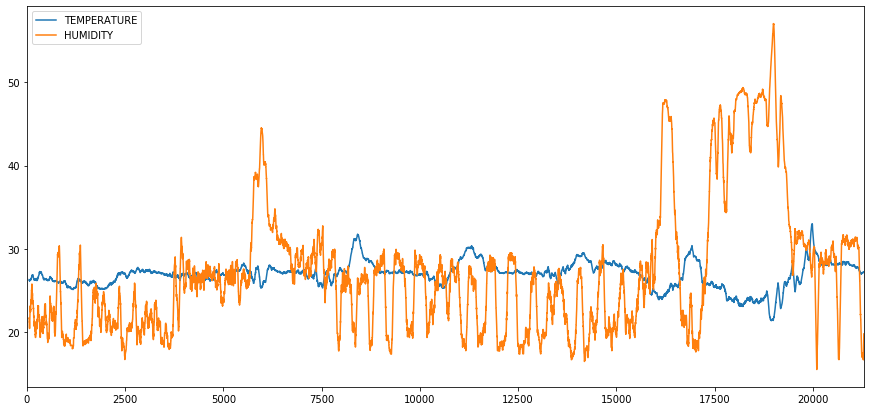

In [68]:
dft[['TEMPERATURE','HUMIDITY']].rolling(60).mean().plot()

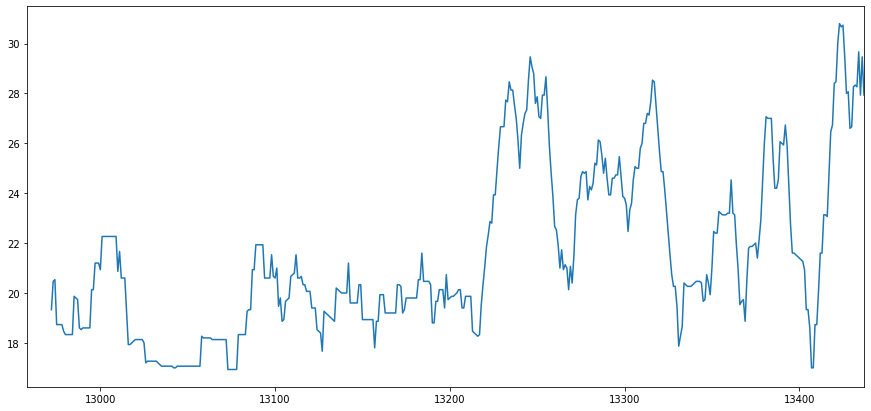

In [88]:
# timestamp range example
dft['TIMESTAMP'] = pd.to_datetime(dft['TIMESTAMP'],unit='s')
dft[(dft['TIMESTAMP'] > '2020-04-01 10:00:00') & 
    (dft['TIMESTAMP'] < '2020-04-01 14:00:00')]['HUMIDITY'].rolling(15).mean().plot()

In [74]:
mux = widgets.Dropdown(options=['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX7'],
                       value='MUX0', description='MUX:')
rolling = widgets.FloatSlider(
         value=60,
         min=1,
         max=200,
         step=1,)
date = widgets.DatePicker(description='Start')
end = widgets.DatePicker(description='End')
# button, output, function and linkage
btn = widgets.Button(description='Filter')
outt = widgets.Output()

def on_btn_clicked(b):
    with outt:
        clear_output()
        #print("MUX:", mux.value, "ROLLING: ", rolling.value)
        print("date:", date.value)
        df[[mux.value]].rolling(int(rolling.value)).mean().plot()
        plt.show()
btn.on_click(on_btn_clicked)

widgets.VBox([mux, rolling, date, end, btn, outt])